In [9]:
# install.packages("GeDS")
# ler biblioteca GeDS
library(GeDS)

In [14]:
data("coalMining")
df <- coalMining
head(df)

,years,accidents
,<dbl>,<dbl>
1,1851,4
2,1852,5
3,1853,4
4,1854,1
5,1855,0
6,1856,4


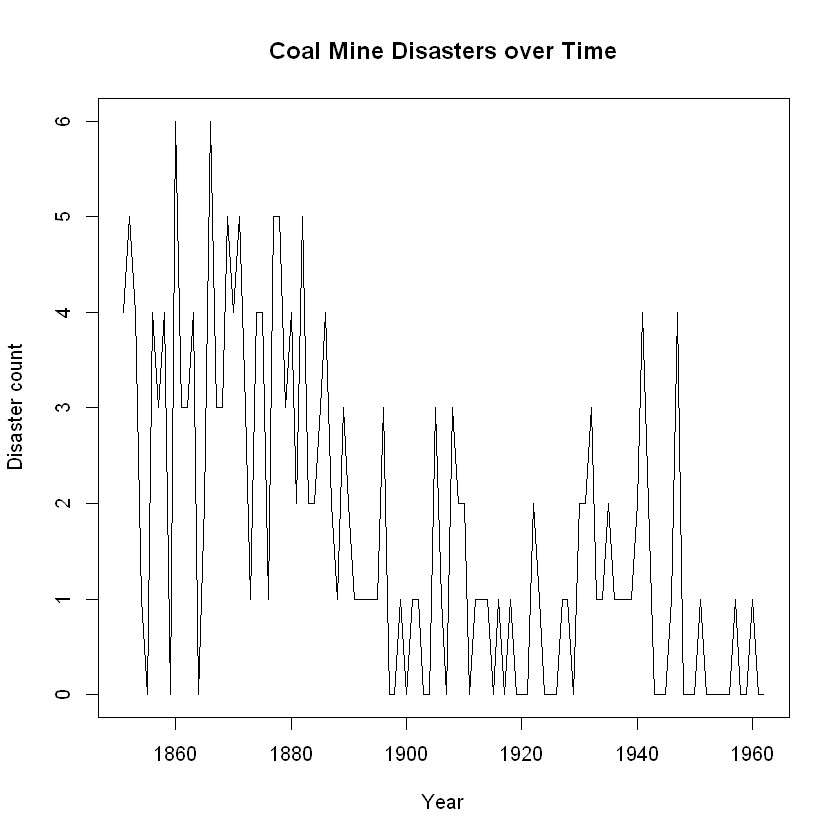

In [19]:
plot(df$years, df$accidents, type = "l", xlab = "Year", ylab = "Disaster count", main = "Coal Mine Disasters over Time")


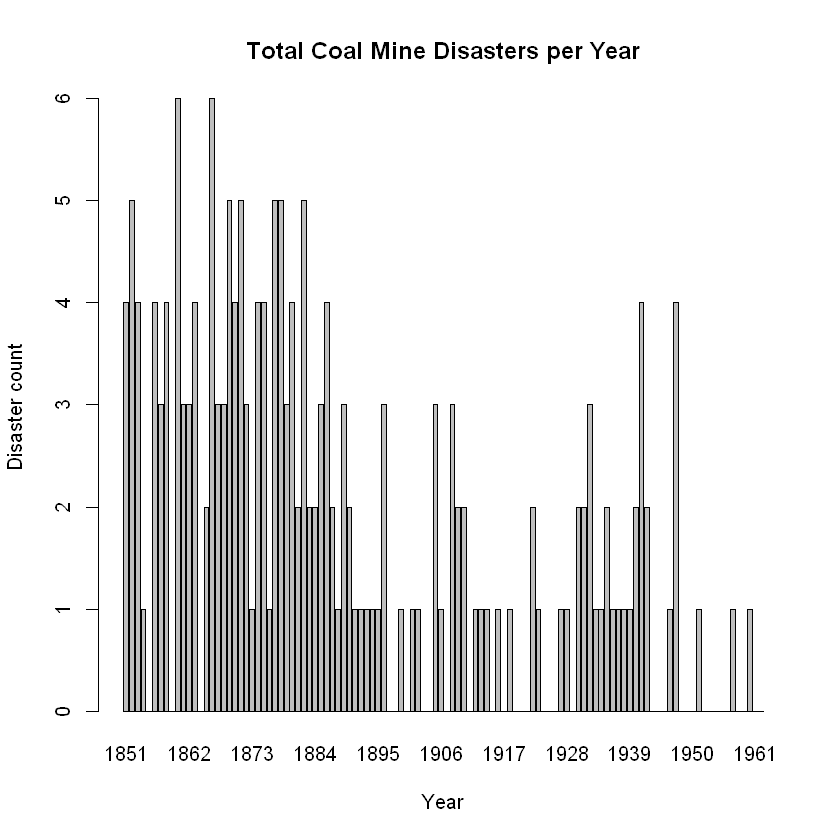

In [20]:
barplot(df$accidents, names.arg = df$years, xlab = "Year", ylab = "Disaster count", main = "Total Coal Mine Disasters per Year")

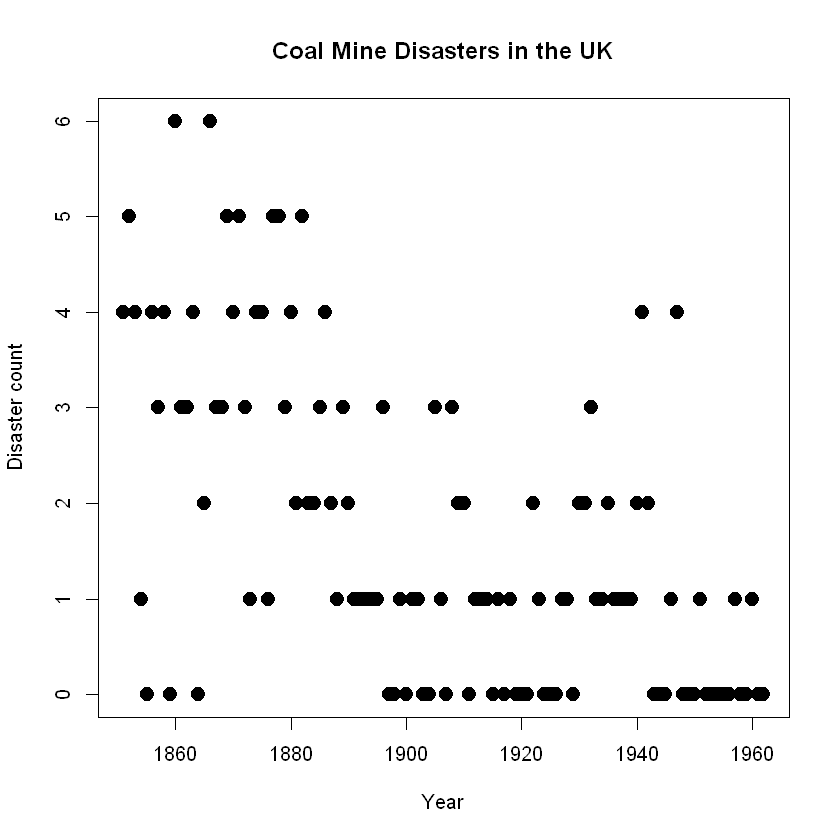

In [16]:
# Plotar o gráfico com título
plot(df$years, df$accidents, pch = 19, cex = 1.5, xlab = "Year", ylab = "Disaster count", main = "Coal Mine Disasters in the UK")


In [24]:
# usa biblioteca ggplot2 e ggdist
library(ggplot2)
library(ggdist)


Warning message:
"package 'ggdist' was built under R version 4.2.3"


ERROR: Error: package or namespace load failed for 'ggdist' in loadNamespace(i, c(lib.loc, .libPaths()), versionCheck = vI[[i]]):
 namespace 'ggplot2' 3.3.6 is already loaded, but >= 3.4.0 is required


In [27]:
install.packages("ggplot2")

Warning message:
"package 'ggplot2' is in use and will not be installed"


In [32]:
install.packages('ggdist')

Installing package into 'C:/Users/anbrg/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'ggdist' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\anbrg\AppData\Local\Temp\Rtmpqw7kGB\downloaded_packages


In [33]:
library(ggplot2)
library(ggdist)

Warning message:
"package 'ggdist' was built under R version 4.2.3"


ERROR: Error: package or namespace load failed for 'ggdist' in loadNamespace(i, c(lib.loc, .libPaths()), versionCheck = vI[[i]]):
 namespace 'ggplot2' 3.3.6 is already loaded, but >= 3.4.0 is required


\[\{ x \in \mathbb{R} \;|\; x > 0 \}\]

       a_{ij} =

       \begin{cases}

             1, & \mbox{se } v_i \mbox{e } v_j \mbox{são adjacentes;} \\

             0, & \mbox{caso contrário.}

       \end{cases}

In [36]:
\left\{
\begin{array}{c}
  a + b = c \\
  d - e = f \\
\end{array}
\right\}


ERROR: Error in parse(text = x, srcfile = src): <text>:1:2: unexpected symbol
1: \left
     ^


$X|\lambda_1,K \sim \text{Poisson}(\lambda_1)$ para $j=1,...,K$: Distribuição de Poisson com parâmetro $\lambda_1$ para os valores de $j$ de 1 a $K$.
$X|\lambda_2,K \sim \text{Poisson}(\lambda_2)$ para $j=K+1,...,112$: Distribuição de Poisson com parâmetro $\lambda_2$ para os valores de $j$ de $K+1$ a 112.

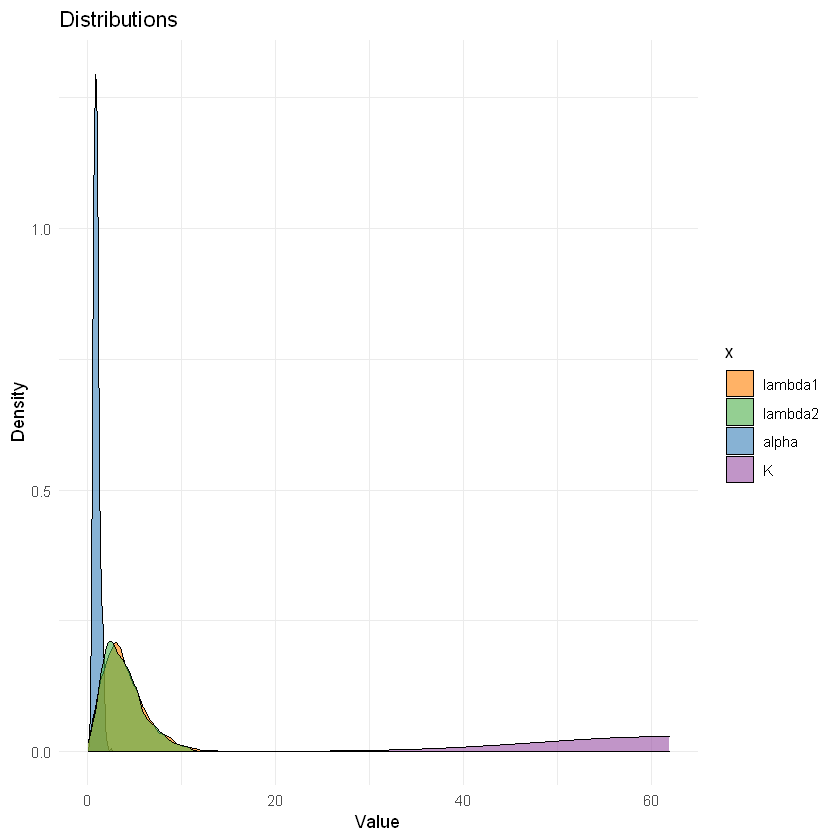

In [34]:
library(ggplot2)

# Definir parâmetros das distribuições
alpha <- rgamma(1, shape = 10, rate = 10)
lambda1 <- rgamma(1, shape = 3, rate = alpha)
lambda2 <- rgamma(1, shape = 3, rate = alpha)
K <- runif(1, min = 1, max = 111)

# Criar dataframe com as amostras
df <- data.frame(x = c(rep("lambda1", 1000), rep("lambda2", 1000), rep("alpha", 1000), rep("K", 1000)),
                 value = c(rgamma(1000, shape = 3, rate = alpha),
                           rgamma(1000, shape = 3, rate = alpha),
                           rgamma(1000, shape = 10, rate = 10),
                           rep(K, 1000)))

# Plotar o gráfico utilizando ggplot2
ggplot(df, aes(x = value, fill = x)) +
  geom_density(alpha = 0.6) +
  theme_minimal() +
  labs(x = "Value", y = "Density", title = "Distributions") +
  scale_fill_manual(values = c("lambda1" = "#FF7F00", "lambda2" = "#4DAF4A", "alpha" = "#377EB8", "K" = "#984EA3"))


Occurrences of disasters in the time series is thought to follow a Poisson process with a large rate parameter in the early part of the time series, and from one with a smaller rate in the later part. We are interested in locating the change point in the series, which perhaps is related to changes in mining safety regulations.

From Bayes rule we know that $P(\Theta|D) = \frac{P(D|\Theta)P(\Theta)}{P(D)}$. $P(\Theta|D)$ is called the posterior distribution, $P(D|\Theta)$ is the likelihood and $P(\Theta)$ is the the prior. The core of Bayesin statistics can be summarized as calculating $posterior \propto likelihood \cdot prior$.

A Bayesian data analysis involves the following steps:

1.  define a prior distribution that incorporates your beliefs about the
    data
2.  acquire some data
3.  use Bayes rule to update the prior distribution given the newly
    acquired data and calculate the posterior distribution
4.  analyse the posterior

The parameters are defined as follows:
* $D_t$: The number of disasters in year $t$;
* $r_t$: The rate parameter of the Poisson distribution of disasters in year $t$;
* $s$: The year in which the rate parameter changes (the switchpoint);
* $e$: The rate parameter before the switchpoint $s$;
* $l$: The rate parameter after the switchpoint $s$;
* $t_l$, $t_h$: The lower and upper boundaries of year $t$.